In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [41]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 10
        self.N = 1
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N = self.N + 1
        self.p_estimate = self.p_estimate + (x - self.p_estimate) / self.N

In [46]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
rewards = np.zeros(NUM_TRIALS)

In [47]:
for i in range(NUM_TRIALS):
    # use optimistic initial values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])
    
    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()
    
    # update rewards log
    rewards[i] = x
    
    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

In [43]:
# print mean estimates for each bandit
for b in bandits:
    print("mean estimate:", b.p_estimate)

mean estimate: 0.7142857142857142
mean estimate: 0.7317073170731707
mean estimate: 0.7512020836115941


In [50]:
# print total reward
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num times selected each bandit:", [b.N-1 for b in bandits])

total reward earned: 7439.0
overall win rate: 0.7439
num times selected each bandit: [14, 50, 9936]


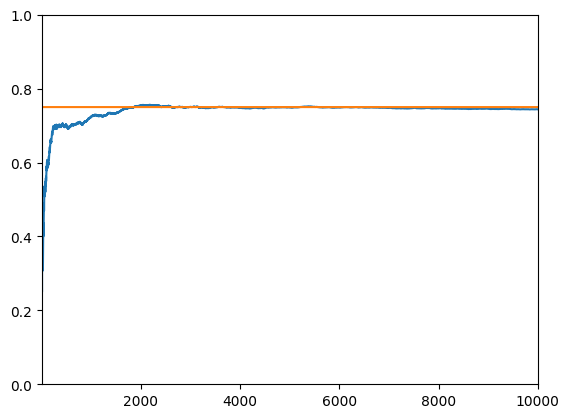

In [51]:
# plot the results
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
plt.ylim([0, 1])
plt.xlim([1, NUM_TRIALS])
plt.plot(win_rates)
plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
plt.show()

In [28]:
cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

array([1.        , 0.5       , 0.66666667, ..., 0.74534907, 0.74537454,
       0.7453    ], shape=(10000,))

In [31]:
type(range(NUM_TRIALS)+1)

TypeError: unsupported operand type(s) for +: 'range' and 'int'